## Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras as kr
import sklearn
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import itertools
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
data = pd.read_csv('El-Nino.csv', sep = '\t')

In [3]:
data.head()

,Season,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


### Replace all column names by overwritting on it

In [4]:
cols = ['Year','Janauary','February','March','April','May','June','July','August','September','October','November','December']

In [5]:
data.columns = cols

In [6]:
data.head(10)

,Year,Janauary,February,March,April,May,June,July,August,September,October,November,December
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7
5,1955,-0.7,-0.7,-1.1,-1.4,-1.7,-1.5,-1.1,-0.8,-0.6,-0.5,-0.5,-0.5
6,1956,-0.6,-0.6,-0.5,-0.4,-0.4,-0.4,-0.2,0.1,0.4,0.7,0.9,1.1
7,1957,1.3,1.3,1.3,1.4,1.5,1.7,1.8,1.7,1.3,0.9,0.7,0.6
8,1958,0.6,0.4,0.4,0.4,0.5,0.6,0.6,0.6,0.5,0.3,0.2,-0.1
9,1959,-0.2,-0.3,-0.1,0.0,0.0,0.0,-0.1,-0.1,-0.1,0.0,0.0,0.0


### Set Index as Year

In [7]:
data.set_index('Year', inplace = True)
data.head()

,Janauary,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


### Do transpose to know, how many years are present

In [8]:
data1 = data.transpose()
data1

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Janauary,-0.5,0.7,-0.1,0.7,-0.6,-0.7,-0.6,1.3,0.6,-0.2,...,-0.4,0.5,-1.0,-0.5,0.3,-0.4,0.1,1.5,-0.3,0.2
February,-0.4,0.9,0.0,0.7,-0.8,-0.7,-0.6,1.3,0.4,-0.3,...,-0.3,0.5,-1.4,-0.7,0.3,-0.4,0.0,1.8,-0.6,-0.1
March,-0.4,1.0,0.2,0.8,-0.9,-1.1,-0.5,1.3,0.4,-0.1,...,-0.3,0.7,-1.6,-0.9,0.3,-0.3,0.2,2.1,-0.7,-0.4
April,-0.4,1.2,0.1,0.8,-0.8,-1.4,-0.4,1.4,0.4,0.0,...,-0.4,1.0,-1.7,-1.1,0.2,-0.2,0.4,2.4,-0.7,-0.7
May,-0.6,1.0,0.0,0.8,-0.7,-1.7,-0.4,1.5,0.5,0.0,...,-0.6,1.3,-1.7,-1.1,0.0,-0.2,0.6,2.5,-0.7,-0.9
June,-0.8,0.8,0.1,0.8,-0.7,-1.5,-0.4,1.7,0.6,0.0,...,-0.7,1.6,-1.6,-1.0,-0.2,-0.3,0.7,2.6,-0.6,-1.0
July,-0.8,0.5,0.4,0.8,-0.7,-1.1,-0.2,1.8,0.6,-0.1,...,-0.8,1.5,-1.4,-0.8,-0.4,-0.4,0.6,2.5,-0.3,-0.9
August,-0.5,0.4,0.6,0.5,-0.6,-0.8,0.1,1.7,0.6,-0.1,...,-0.7,1.3,-1.1,-0.6,-0.3,-0.4,0.6,2.2,-0.1,-0.8
September,-0.2,0.3,0.6,0.0,-0.7,-0.6,0.4,1.3,0.5,-0.1,...,-0.5,0.9,-0.8,-0.5,-0.2,-0.2,0.6,1.7,0.1,-0.6
October,0.2,0.3,0.7,-0.4,-0.8,-0.5,0.7,0.9,0.3,0.0,...,-0.2,0.4,-0.6,-0.4,-0.2,0.1,0.8,1.0,0.3,-0.4


### Generate the date_range series 

In [9]:
dates = pd.date_range(start = '1950-01', freq = 'MS', periods = len(data1.columns)*12)
dates

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', length=816, freq='MS')

### Convert the dataframe into matrix 

In [10]:
data_np = data1.transpose().as_matrix()

In [11]:
shape = data_np.shape
shape

(68, 12)

In [12]:
data_np

array([[-0.5, -0.4, -0.4, -0.4, -0.6, -0.8, -0.8, -0.5, -0.2,  0.2,  0.4,
         0.6],
       [ 0.7,  0.9,  1. ,  1.2,  1. ,  0.8,  0.5,  0.4,  0.3,  0.3,  0.2,
         0. ],
       [-0.1,  0. ,  0.2,  0.1,  0. ,  0.1,  0.4,  0.6,  0.6,  0.7,  0.8,
         0.8],
       [ 0.7,  0.7,  0.8,  0.8,  0.8,  0.8,  0.8,  0.5,  0. , -0.4, -0.5,
        -0.5],
       [-0.6, -0.8, -0.9, -0.8, -0.7, -0.7, -0.7, -0.6, -0.7, -0.8, -0.8,
        -0.7],
       [-0.7, -0.7, -1.1, -1.4, -1.7, -1.5, -1.1, -0.8, -0.6, -0.5, -0.5,
        -0.5],
       [-0.6, -0.6, -0.5, -0.4, -0.4, -0.4, -0.2,  0.1,  0.4,  0.7,  0.9,
         1.1],
       [ 1.3,  1.3,  1.3,  1.4,  1.5,  1.7,  1.8,  1.7,  1.3,  0.9,  0.7,
         0.6],
       [ 0.6,  0.4,  0.4,  0.4,  0.5,  0.6,  0.6,  0.6,  0.5,  0.3,  0.2,
        -0.1],
       [-0.2, -0.3, -0.1,  0. ,  0. ,  0. , -0.1, -0.1, -0.1,  0. ,  0. ,
         0. ],
       [ 0.1,  0.2,  0.3,  0.2,  0.1,  0.1,  0. ,  0. ,  0. ,  0.1,  0.2,
         0.3],
       [ 0.1, -0.1, -

### Let's convert the matrix size of 68 x 12 into column vector 

In [13]:
data_np = data_np.reshape((shape[0] * shape[1], 1))

In [14]:
data_np.shape

(816, 1)

### Convert the data_np into dataframe
* Here we are merging two series data i.e data_np and dates series into dataframe.
* As this dataset belongs to timeseries concept, we apply dates series as index to our dataframe.

In [15]:
df = pd.DataFrame({'Mean' : data_np[:,0]})
df.set_index(dates, inplace = True)

In [16]:
df.head()

,Mean
1950-01-01,-0.5
1950-02-01,-0.4
1950-03-01,-0.4
1950-04-01,-0.4
1950-05-01,-0.6


### Now Let's plot how our data looks like

Text(0,0.5,'Mean across Month')

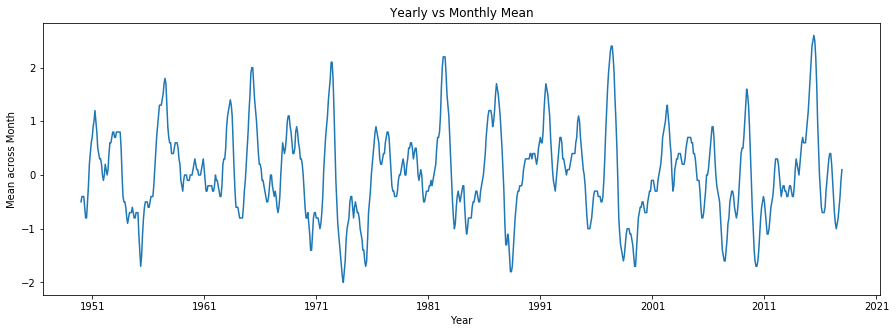

In [17]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Mean'])
plt.title('Yearly vs Monthly Mean')
plt.xlabel('Year')
plt.ylabel('Mean across Month')

In [18]:
dataset = df.values

In [19]:
dataset.shape

(816, 1)

### Here we are splitting the data into train and test set

In [20]:
train = dataset[0:696,:]
test = dataset[696:,:]

In [21]:
print("Original data shape:",dataset.shape)
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Original data shape: (816, 1)
Train shape: (696, 1)
Test shape: (120, 1)


In [22]:
# Converting the data into MinMax Scaler because to avoid any outliers present in our dataset
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(816, 1)

### As we know we use LSTM model to our data then we follow Imporvements over RNN principle
* To see more inbrief Click [here](https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/)

In [23]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
#x_train shape
x_train.shape

(636, 60)

In [25]:
#y_train shape
y_train.shape

(636,)

In [26]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [27]:
x_train.shape

(636, 60, 1)

In [28]:
 # Creating and fitting the model

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

In [29]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs=10, batch_size = 1, verbose = 2)

Epoch 1/10
 - 46s - loss: 0.0137
Epoch 2/10
 - 41s - loss: 0.0040
Epoch 3/10
 - 43s - loss: 0.0026
Epoch 4/10
 - 40s - loss: 0.0014
Epoch 5/10
 - 40s - loss: 0.0011
Epoch 6/10
 - 40s - loss: 0.0011
Epoch 7/10
 - 40s - loss: 0.0010
Epoch 8/10
 - 40s - loss: 0.0011
Epoch 9/10
 - 40s - loss: 9.7459e-04
Epoch 10/10
 - 40s - loss: 9.7957e-04


In [30]:
# Now Let's perform same operations that are done on train set
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [31]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [32]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Mean = model.predict(X_test)
Mean1 = scaler.inverse_transform(Mean)

In [33]:
rms=np.sqrt(np.mean(np.power((test-Mean1),2)))
rms

0.11409219679563656

Text(0.5,1,'Forecasting on Actual data')

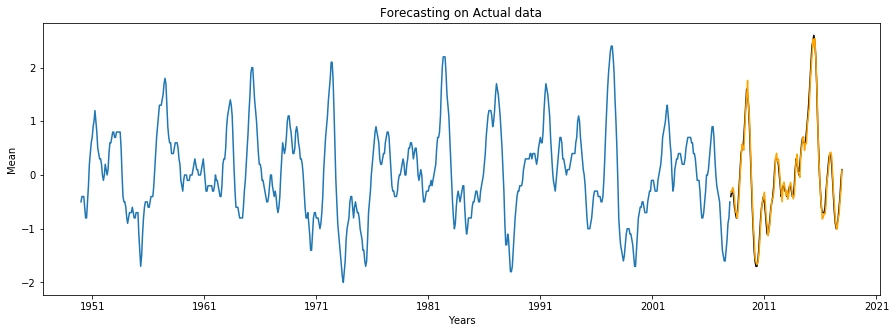

In [34]:
#plotting the train, test and forecast data
train = df[:696]
test = df[696:]
test['Predictions'] = Mean1

plt.figure(figsize=(15,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], color = 'black')
plt.plot(test['Predictions'], color = 'orange')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.title('Forecasting on Actual data')


In [35]:
# Here we are taking steps as 2, means we have taken test size as 120 that is step-1 and steps=2 
#means taking 120 test values and 120 future values i.e next 10 year values from test data
trainpred = model.predict(X_test,steps=2)

In [36]:
trainpred.shape

(240, 1)

In [1]:
#trainpred

In [37]:
pred = scaler.inverse_transform(trainpred)

In [38]:
 # Total predicted values are 240, but now I'm printing only first 24 values
pred[0:24] 

array([[-0.30797675],
       [-0.32348582],
       [-0.23456538],
       [-0.28430969],
       [-0.44652319],
       [-0.68863273],
       [-0.70321208],
       [-0.80344605],
       [-0.6006459 ],
       [-0.34957871],
       [-0.00185518],
       [ 0.28722697],
       [ 0.5749976 ],
       [ 0.51443315],
       [ 0.46349242],
       [ 0.87143564],
       [ 1.21683323],
       [ 1.46062243],
       [ 1.75970602],
       [ 1.25301909],
       [ 1.06083488],
       [ 0.55151343],
       [ 0.00479125],
       [-0.42584747]], dtype=float32)

In [39]:
test.head()

,Mean,Predictions
2008-01-01,-0.4,-0.307977
2008-02-01,-0.3,-0.323486
2008-03-01,-0.3,-0.234565
2008-04-01,-0.4,-0.284310
2008-05-01,-0.6,-0.446523


In [41]:
test.tail(12)

,Mean,Predictions
2017-01-01,0.2,0.355351
2017-02-01,-0.1,0.023194
2017-03-01,-0.4,-0.301900
2017-04-01,-0.7,-0.558783
2017-05-01,-0.9,-0.840018
2017-06-01,-1.0,-0.966370
2017-07-01,-0.9,-1.008473
2017-08-01,-0.8,-0.813898
2017-09-01,-0.6,-0.723789
2017-10-01,-0.4,-0.479220


In [74]:
# Now printing the test Accuracy
testScore = math.sqrt(mean_squared_error(test['Mean'], trainpred[:120,0]))*100
print('Accuracy Score: %.2f' % (testScore))

Accuracy Score: 83.48


In [90]:
# # Now we will predict the next year values of monthly wise
# # Here our test values are present upto 2017
# steps_yr = 120
# d = int(input("Enter the number of months:"))
# a = pred[steps_yr:steps_yr+d]  # Our Test values are present upto 120 and now we are predicting next year values i.e 2018
# a

In [51]:
# # Here we can check monthly wise weather condition
# print(a[21][0])
# if a[21][0] >= 0.5 and a[21][0] <= 0.9:
#     print('It is Weak El-Nino')
# elif a[21][0] >= 1.0 and a[21][0] <= 1.4:
#     print('It is Moderate El-Nino')
# elif a[21][0] >= 1.5 and a[21][0] <= 1.9:
#     print('It is Strong El-Nino')
# elif a[21][0] >= 2:
#     print('It is Very Strong El-Nino')
# elif a[21][0] <=-0.5 and a[21][0] >= -0.9:
#     print('It is Weak La-Nina')
# elif a[21][0] <= -1 and a[21][0] >= -1.4:
#     print('It is Moderate La-Nina')
# elif a[21][0] <= -1.5:
#     print('It is Strong La-Nina')
# else:
#     print('It is a Moderate Season')


0.551513
It is Weak El-Nino


In [55]:
# # Now we can also check year wise weather condition
# b = pred[132:144].mean(axis = 0)
# b

array([ 0.77548605], dtype=float32)

In [88]:
step_yr = 2017
yr = int(input('Enter the Year to Predict:'))
c = yr - step_yr
e = c-1
b = pred[120+(e*12) : 120+(e*12)+12].mean(axis=0)

Enter the Year to Predict:2021


In [89]:
print(b)
if b >= 0.5 and b <= 0.9:
    print(yr, 'is Weak El-Nino')
elif b >= 1.0 and b <= 1.4:
    print('It is Moderate El-Nino')
elif b >= 1.5 and b <= 1.9:
    print(yr, 'is Strong El-Nino')
elif b >= 2:
    print(yr, 'is Very Strong El-Nino')
elif b <=-0.5 and b >= -0.9:
    print(yr, 'is Weak La-Nina')
elif b <= -1 and b >= -1.4:
    print(yr, 'is Moderate La-Nina')
elif b <= -1.5:
    print(yr, 'is Strong La-Nina')
else:
    print(yr, 'is a Moderate Year')

[-0.63278145]
2021 is Weak La-Nina


In [58]:
# Now plot the graph of future predicted values for that generate a date range series upto 2027
dates1 = pd.date_range(start = '2008-01', freq = 'MS', end = '2027-12')
dates1

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2027-03-01', '2027-04-01', '2027-05-01', '2027-06-01',
               '2027-07-01', '2027-08-01', '2027-09-01', '2027-10-01',
               '2027-11-01', '2027-12-01'],
              dtype='datetime64[ns]', length=240, freq='MS')

In [59]:
new_df = pd.DataFrame({'Predicted_values':pred[:,0]})


In [60]:
new_df.set_index(dates1, inplace = True)

In [61]:
new_df.head()

,Predicted_values
2008-01-01,-0.307977
2008-02-01,-0.323486
2008-03-01,-0.234565
2008-04-01,-0.284310
2008-05-01,-0.446523


In [62]:
new_df.tail()

,Predicted_values
2027-08-01,-0.813898
2027-09-01,-0.723789
2027-10-01,-0.479220
2027-11-01,-0.275214
2027-12-01,0.091570


Text(0.5,1,'Forecasting on Actual data')

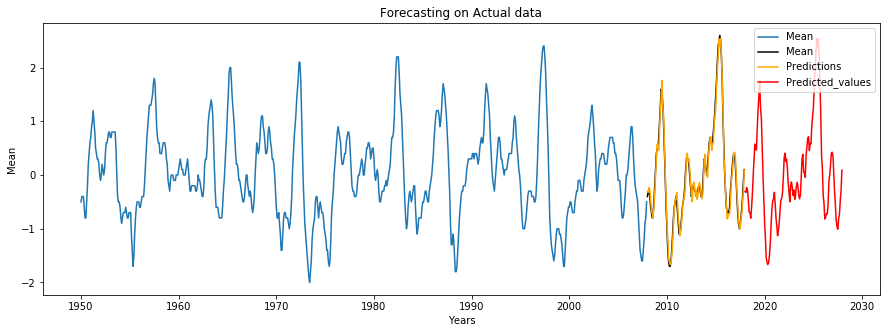

In [65]:
plt.figure(figsize=(15,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], color = 'black')
plt.plot(test['Predictions'], color = 'orange')
plt.plot(new_df['Predicted_values'][120:], color = 'red')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.legend(loc = True)
plt.title('Forecasting on Actual data')
